In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import deepchem as dc
import chemfp
import chemfp.bitops
from rdkit.Chem import rdFingerprintGenerator
from rdkit import Chem
from rdkit import Chem
from rdkit import DataStructs
import rdkit



In [171]:
df = pd.read_csv('./gens/0_5.txt')

In [172]:
df

,deviation,gen_target,gen_input,target_percent,input_percent,total_input_fraction,unique_ratio,unique_elements_len,calc_time,long_ratio,new_percent
0,0.0,0.000077,0.001536,0.263158,0.026316,0.004981,0.000029,38,50.117938,0.552632,0.157895
1,0.1,0.000077,0.001536,0.156250,0.015625,0.004981,0.000049,64,50.035676,0.531250,0.296875
2,0.2,0.000077,0.001536,0.105263,0.010526,0.004981,0.000073,95,49.976304,0.442105,0.442105
3,0.3,0.000108,0.001536,0.099291,0.007092,0.004981,0.000108,141,49.820853,0.397163,0.496454
4,0.4,0.000146,0.001536,0.094527,0.004975,0.004981,0.000154,201,49.877968,0.388060,0.512438
5,0.5,0.000192,0.001536,0.100000,0.004000,0.004981,0.000191,250,49.854077,0.396000,0.500000
6,0.6,0.000208,0.001536,0.090909,0.003367,0.004981,0.000227,297,49.935816,0.420875,0.484848
7,0.7,0.000215,0.001536,0.076923,0.002747,0.004981,0.000278,364,49.816508,0.409341,0.510989
8,0.8,0.000261,0.001536,0.077273,0.002273,0.004981,0.000336,440,49.904999,0.454545,0.465909
9,0.9,0.000285,0.001536,0.067642,0.001828,0.004981,0.000418,547,50.188475,0.440585,0.489945


In [173]:
gen_target = df['gen_target'].tolist()
gen_input= df['gen_input'].tolist()
deviation = df['deviation'].tolist()
input_percent =df['input_percent'].tolist()
new_percent = df['new_percent'].tolist()
target_percent = df['target_percent'].tolist()
long_ratio = df['long_ratio'].tolist()
unique_elements_len = df['unique_elements_len'].tolist()

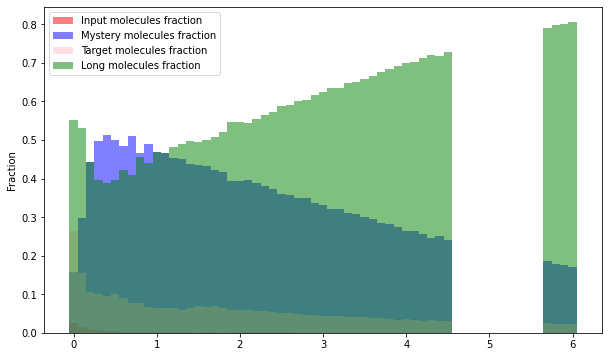

In [174]:
bar_width = deviation[1] - deviation[0]

plt.figure(figsize=(10, 6))
plt.bar(deviation, input_percent, width=bar_width, alpha=0.5, label='Input molecules fraction', color = 'red')
plt.bar(deviation, new_percent, width=bar_width, alpha=0.5, label='Mystery molecules fraction', color = 'blue')
plt.bar(deviation, target_percent, width=bar_width, alpha=0.5, label='Target molecules fraction', color = 'pink')
plt.bar(deviation, long_ratio, width=bar_width, alpha=0.5, label='Long molecules fraction', color = 'green')



plt.xlabel('')
plt.ylabel('Fraction')
plt.legend()
plt.show()

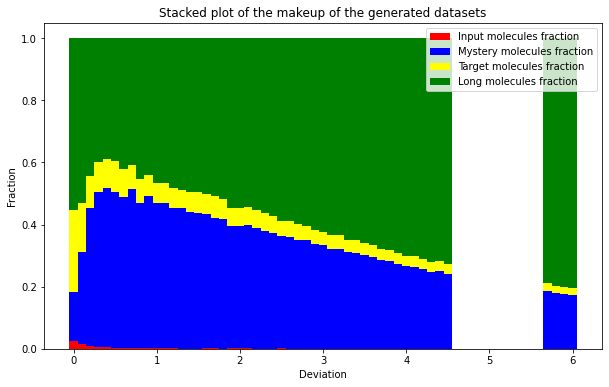

In [175]:
import matplotlib.pyplot as plt


bar_width = deviation[1] - deviation[0]

plt.figure(figsize=(10, 6))
plt.bar(deviation, input_percent, width=bar_width, label='Input molecules fraction', color='red')
plt.bar(deviation, new_percent, width=bar_width, label='Mystery molecules fraction', color='blue', bottom=input_percent)
plt.bar(deviation, target_percent, width=bar_width, label='Target molecules fraction', color='yellow', bottom=[i + j for i, j in zip(input_percent, new_percent)])
plt.bar(deviation, long_ratio, width=bar_width, label='Long molecules fraction', color='green', bottom=[i + j + k for i, j, k in zip(input_percent, new_percent, target_percent)])

plt.xlabel('Deviation')
plt.ylabel('Fraction')
plt.title('Stacked plot of the makeup of the generated datasets')
plt.legend()
plt.show()


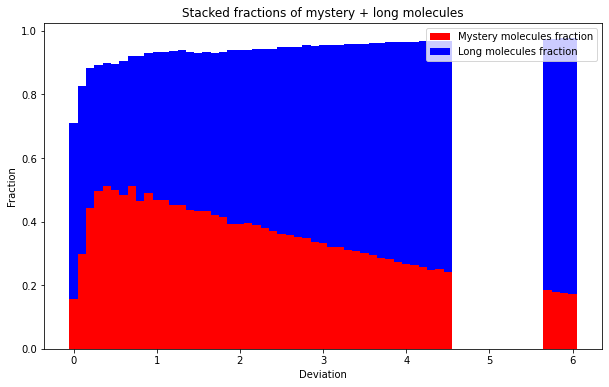

In [176]:
bar_width = deviation[1] - deviation[0]

plt.figure(figsize=(10, 6))
plt.bar(deviation, new_percent, width=bar_width, label='Mystery molecules fraction', color='red')
plt.bar(deviation, long_ratio, width=bar_width, label='Long molecules fraction', color='blue', bottom=new_percent)

plt.xlabel('Deviation')
plt.ylabel('Fraction')
plt.title('Stacked fractions of mystery + long molecules')
plt.legend()
plt.show()


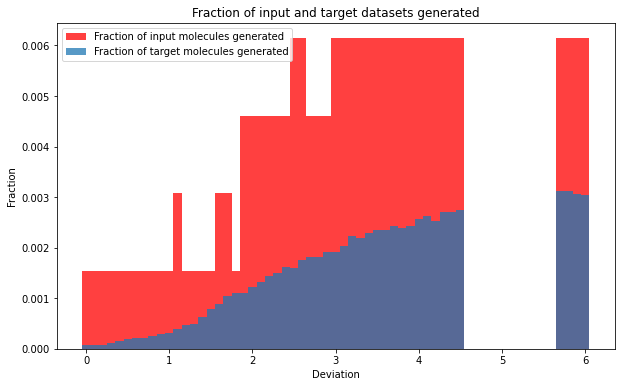

In [177]:
bar_width = deviation[1] - deviation[0]

plt.figure(figsize=(10, 6))
plt.bar(deviation, gen_input, width=bar_width, alpha=0.75, label='Fraction of input molecules generated', color='red')
plt.bar(deviation, gen_target, width=bar_width, alpha=0.75, label='Fraction of target molecules generated')


plt.xlabel('Deviation')
plt.ylabel('Fraction')
plt.title('Fraction of input and target datasets generated')
plt.legend()
plt.show()


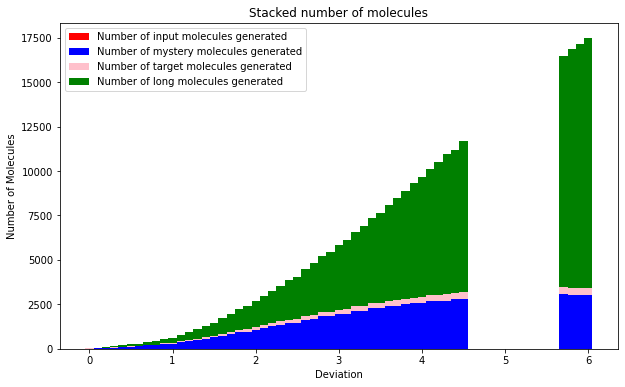

In [178]:
import matplotlib.pyplot as plt

# Your data

total_molecules_generated = unique_elements_len

bar_width = deviation[1] - deviation[0]

plt.figure(figsize=(10, 6))

for i in range(len(deviation)):
    deviation_i = deviation[i]
    
    # Calculate the actual number of molecules for each category for the current deviation
    input_count = input_percent[i] * total_molecules_generated[i]
    new_count = new_percent[i] * total_molecules_generated[i]
    target_count = target_percent[i] * total_molecules_generated[i]
    long_count = long_ratio[i] * total_molecules_generated[i]

    if deviation_i == max(deviation):

        plt.bar(deviation_i, input_count, width=bar_width, label='Number of input molecules generated', color='red')
        plt.bar(deviation_i, new_count, width=bar_width, label='Number of mystery molecules generated', color='blue', bottom=input_count)
        plt.bar(deviation_i, target_count, width=bar_width, label='Number of target molecules generated', color='pink', bottom=input_count + new_count)
        plt.bar(deviation_i, long_count, width=bar_width, label='Number of long molecules generated', color='green', bottom=input_count + new_count + target_count)
    else:
        plt.bar(deviation_i, input_count, width=bar_width, color='red')
        plt.bar(deviation_i, new_count, width=bar_width, color='blue', bottom=input_count)
        plt.bar(deviation_i, target_count, width=bar_width, color='pink', bottom=input_count + new_count)
        plt.bar(deviation_i, long_count, width=bar_width, color='green', bottom=input_count + new_count + target_count)

plt.xlabel('Deviation')
plt.ylabel('Number of Molecules')
plt.title('Stacked number of molecules')
plt.legend()
plt.show()

